# Visualizing Network Data

The cliche goes that the world is an increasingly interconnected place, and the connections between different entities are often best represented with a graph. Graphs are comprised of vertices (also often called "nodes") and edges connecting those nodes. In this assignment, we will learn how to visualize networks using the igraph package in R.

For this assignment, we will visualize social networking data using anonymized data from Facebook; this data was originally curated in a recent paper about computing social circles in social networks. In our visualizations, the vertices in our network will represent Facebook users and the edges will represent these users being Facebook friends with each other.

The first file we will use, edges.csv, contains variables V1 and V2, which label the endpoints of edges in our network. Each row represents a pair of users in our graph who are Facebook friends. For a pair of friends A and B, edges.csv will only contain a single row -- the smaller identifier will be listed first in this row. From this row, we will know that A is friends with B and B is friends with A.

The second file, users.csv, contains information about the Facebook users, who are the vertices in our network. This file contains the following variables:

    id: A unique identifier for this user; this is the value that appears in the rows of edges.csv

    gender: An identifier for the gender of a user taking the values A and B. Because the data is anonymized, we don't know which value refers to males and which value refers to females.

    school: An identifier for the school the user attended taking the values A and AB (users with AB attended school A as well as another school B). Because the data is anonymized, we don't know the schools represented by A and B.

    locale: An identifier for the locale of the user taking the values A and B. Because the data is anonymized, we don't know which value refers to what locale.

### Problem 1.1 - Summarizing the Data
Load the data from edges.csv into a data frame called edges, and load the data from users.csv into a data frame called users.

**How many Facebook users are there in our dataset?**

In [1]:
# Load data

edges = read.csv("data/edges.csv")

head(edges)

,V1,V2
,<int>,<int>
1,4019,4026
2,4023,4031
3,4023,4030
4,4027,4032
5,3988,4021
6,3982,3986


In [2]:
# Load data

users = read.csv("data/users.csv")

head(users)

,id,gender,school,locale
,<int>,<fct>,<fct>,<fct>
1,3981,A,A,B
2,3982,B,,B
3,3983,B,,B
4,3984,B,,B
5,3985,B,,B
6,3986,B,A,B


In [3]:
str(users)

'data.frame':	59 obs. of  4 variables:
 $ id    : int  3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 ...
 $ gender: Factor w/ 3 levels "","A","B": 2 3 3 3 3 3 2 3 3 2 ...
 $ school: Factor w/ 3 levels "","A","AB": 2 1 1 1 1 2 1 1 2 1 ...
 $ locale: Factor w/ 3 levels "","A","B": 3 3 3 3 3 3 2 3 3 2 ...


In [4]:
nrow(users)

[1] 59

**In our dataset, what is the average number of friends per user?** Hint: this question is tricky, and it might help to start by thinking about a small example with two users who are friends.

In [5]:
# Output summary
avg = (nrow(edges)*2)/nrow(users)
avg

[1] 4.949153

In [6]:
round(avg,2)

[1] 4.95

### Problem 1.2 - Summarizing the Data
**Out of all the students who listed a school, what was the most common locale?**

In [7]:
# Most common locale
table(users$locale, users$school)

   
        A AB
     3  0  0
  A  6  0  0
  B 31 17  2

In [8]:
max(table(users$locale, users$school))

[1] 31

Answer: Locale B.

### Problem 1.3 - Summarizing the Data
**Is it possible that either school A or B is an all-girls or all-boys school?**

In [9]:
# Tabulate if AB or B is gender specific school
table(users$gender, users$school)

   
        A AB
     1  1  0
  A 11  3  1
  B 28 13  1

Answer: Both genders A and B have attended schools A and B.

### Problem 2.1 - Creating a Network
We will be using the igraph package to visualize networks; install and load this package using the install.packages and library commands.

We can create a new graph object using the graph.data.frame() function. Based on ?graph.data.frame, **which of the following commands will create a graph g describing our social network, with the attributes of each user correctly loaded?**

Note: A directed graph is one where the edges only go one way -- they point from one vertex to another. The other option is an undirected graph, which means that the relations between the vertices are symmetric.

In [10]:
#install.packages("igraph")
library("igraph")


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [11]:
# Set graph object
g = graph.data.frame(edges, FALSE, users) 

Answer: g = graph.data.frame(edges, FALSE, users)

### Problem 2.2 - Creating a Network
Use the correct command from Problem 2.1 to load the graph g.

Now, we want to plot our graph. By default, the vertices are large and have text labels of a user's identifier. Because this would clutter the output, we will plot with no text labels and smaller vertices:

    plot(g, vertex.size=5, vertex.label=NA)

In this graph, there are a number of groups of nodes where all the nodes in each group are connected but the groups are disjoint from one another, forming "islands" in the graph. Such groups are called "connected components," or "components" for short. **How many connected components with at least 2 nodes are there in the graph?**

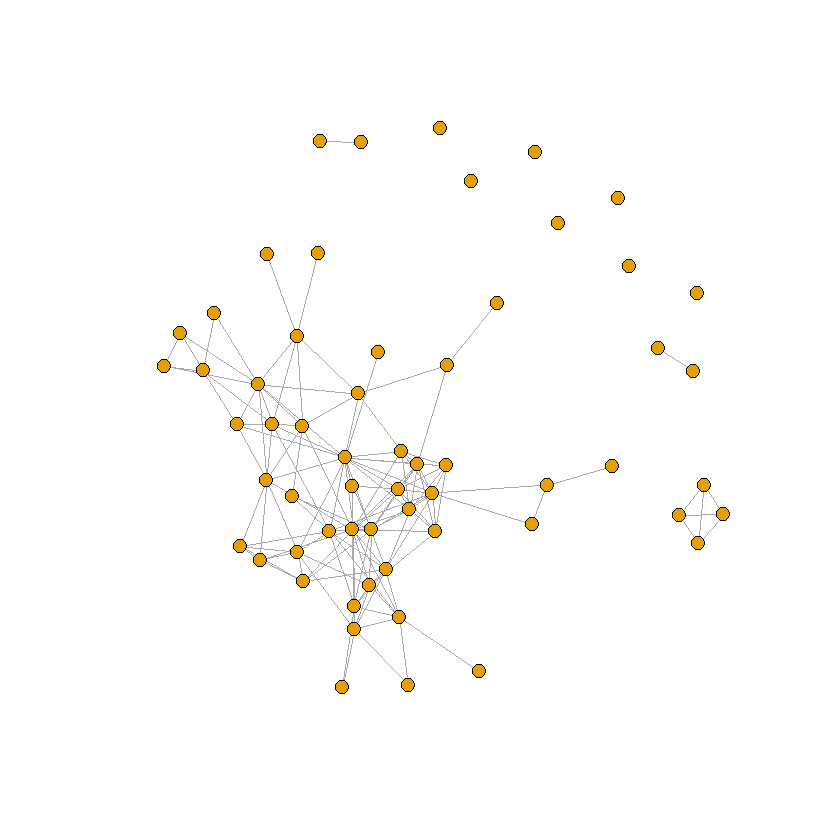

In [12]:
# Plot Graph
plot(g, vertex.size=5, vertex.label=NA)

Answer: There are 4 connected components with at least 2 node.

**How many users are there with no friends in the network?**

Answer: There are 7 users are there with no friends in the network.

### Problem 2.3 - Creating a Network
In our graph, the "degree" of a node is its number of friends. We have already seen that some nodes in our graph have degree 0 (these are the nodes with no friends), while others have much higher degree. We can use degree(g) to compute the degree of all the nodes in our graph g.

**How many users are friends with 10 or more other Facebook users in this network?**

In [13]:
# Compute the Degree

deg = degree(g)

table(deg >=10)


FALSE  TRUE 
   50     9 

Answer: There are 9 users with 10 more friends in this network.

In [14]:
# Let's see the connections 5 to 10

for (i in 5:10) {

    deg = degree(g)
    
    print(table(deg >=i))
}


FALSE  TRUE 
   31    28 

FALSE  TRUE 
   35    24 

FALSE  TRUE 
   39    20 

FALSE  TRUE 
   42    17 

FALSE  TRUE 
   48    11 

FALSE  TRUE 
   50     9 


### Problem 2.4 - Creating a Network
In a network, it's often visually useful to draw attention to "important" nodes in the network. While this might mean different things in different contexts, in a social network we might consider a user with a large number of friends to be an important user. From the previous problem, we know this is the same as saying that nodes with a high degree are important users.

To visually draw attention to these nodes, we will change the size of the vertices so the vertices with high degrees are larger. To do this, we will change the "size" attribute of the vertices of our graph to be an increasing function of their degrees:

    V(g)$size = degree(g)/2+2

In [15]:
# Change the size attribute
V(g)$size = degree(g)/2+2

Now that we have specified the vertex size of each vertex, we will no longer use the vertex.size parameter when we plot our graph:

    plot(g, vertex.label=NA)

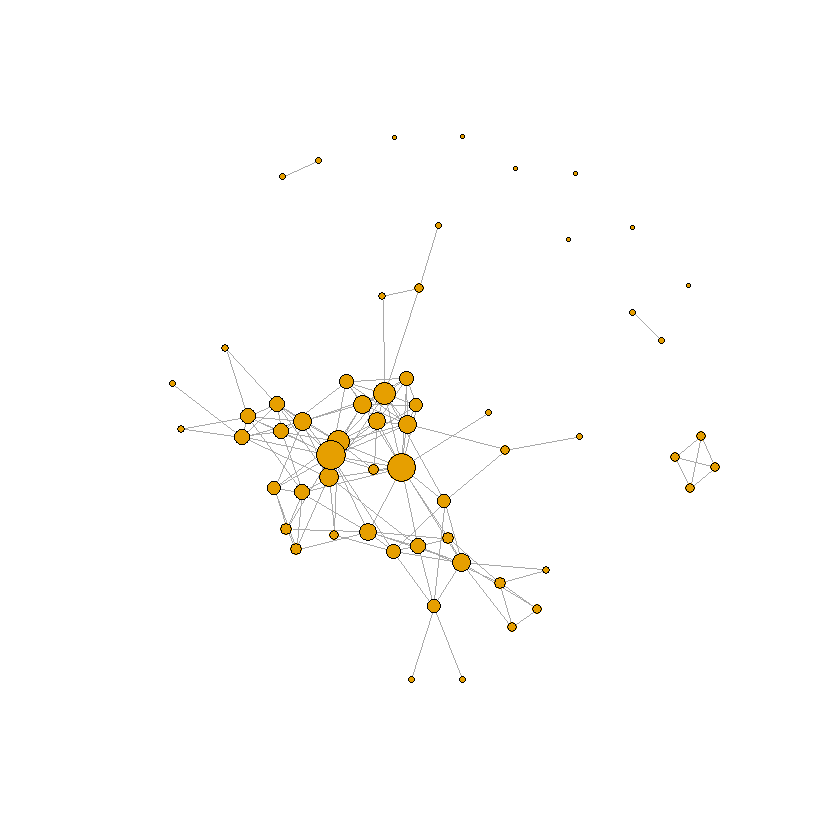

In [16]:
# Plot new graph
plot(g, vertex.label=NA)

**What is the largest size we assigned to any node in our graph?**

In [17]:
# Maximum degree of g
max(V(g)$size)

[1] 11

**What is the smallest size we assigned to any node in our graph?**

In [18]:
# Minimum degree of g
min(V(g)$size)

[1] 2

### Problem 3.1 - Coloring Vertices
Thus far, we have changed the "size" attributes of our vertices. However, we can also change the colors of vertices to capture additional information about the Facebook users we are depicting.

When changing the size of nodes, we first obtained the vertices of our graph with V(g) and then accessed the the size attribute with V(g)\\$size. To change the color, we will update the attribute V(g)$color.

To color the vertices based on the gender of the user, we will need access to that variable. When we created our graph g, we provided it with the data frame users, which had variables gender, school, and locale. These are now stored as attributes V(g)\\$gender, V(g)\\$school, and V(g)\\$locale.

We can update the colors by setting the color to black for all vertices, than setting it to red for the vertices with gender A and setting it to gray for the vertices with gender B:

    V(g)$color = "black"

    V(g)$color[V(g)$gender == "A"] = "red"

    V(g)$color[V(g)$gender == "B"] = "gray"

In [19]:
# Update the Colors
V(g)$color = "black"
V(g)$color[V(g)$gender == "A"] = "red"
V(g)$color[V(g)$gender == "B"] = "gray"

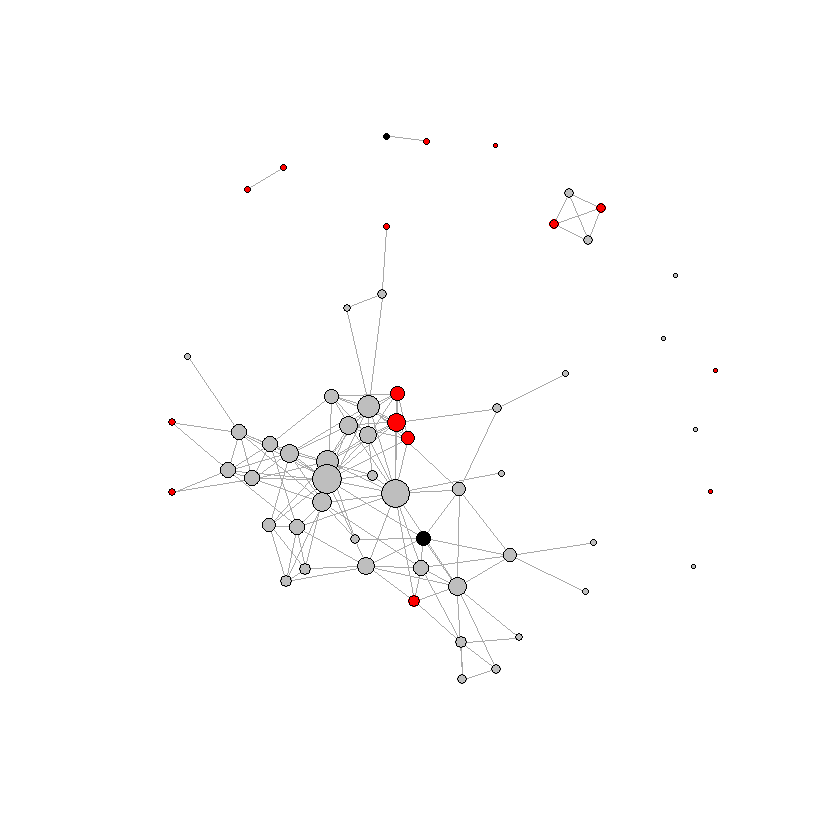

In [20]:
# Plot the Graph
plot(g, vertex.label=NA)

**Plot the resulting graph. What is the gender of the users with the highest degree in the graph?**

Answer: Gender B is the gender of the users with the highest degree.

### Problem 3.2 - Coloring Vertices
Now, color the vertices based on the school that each user in our network attended.

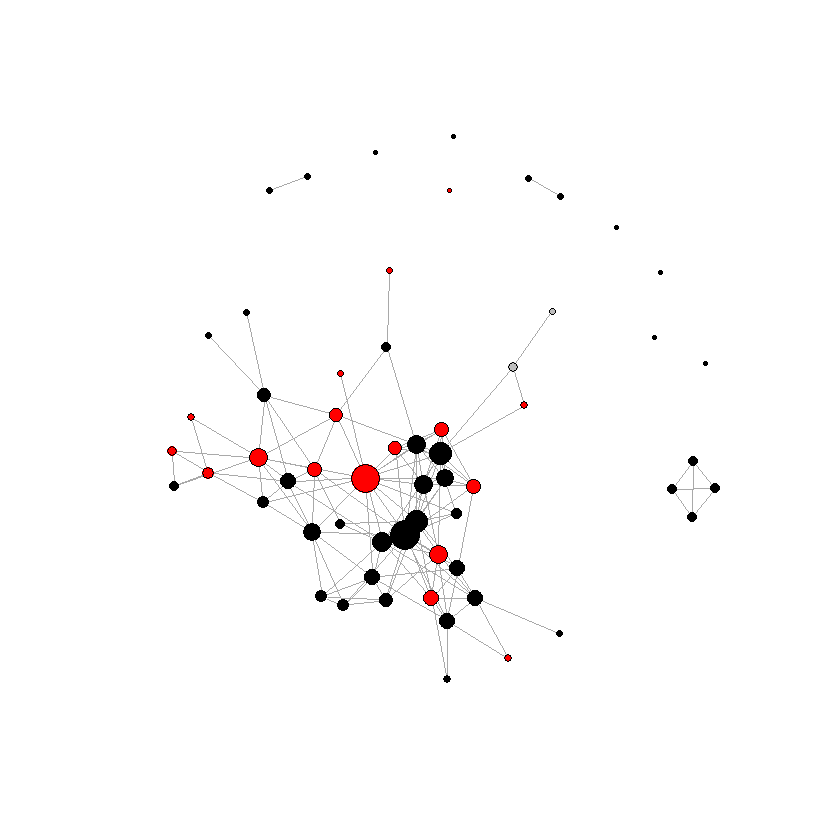

In [21]:
# Update colors for school
V(g)$color = "black"
V(g)$color[V(g)$school == "A"] = "red"
V(g)$color[V(g)$school == "AB"] = "gray"

# Plot graph
plot(g, vertex.label=NA)

**Are the two users who attended both schools A and B Facebook friends with each other?**

Answer: Yes.

**What best describes the users with highest degree?**

Answer: Some, but not all, of the high-degree users attended school A.

### Problem 3.3 - Coloring Vertices
Now, color the vertices based on the locale of the user.

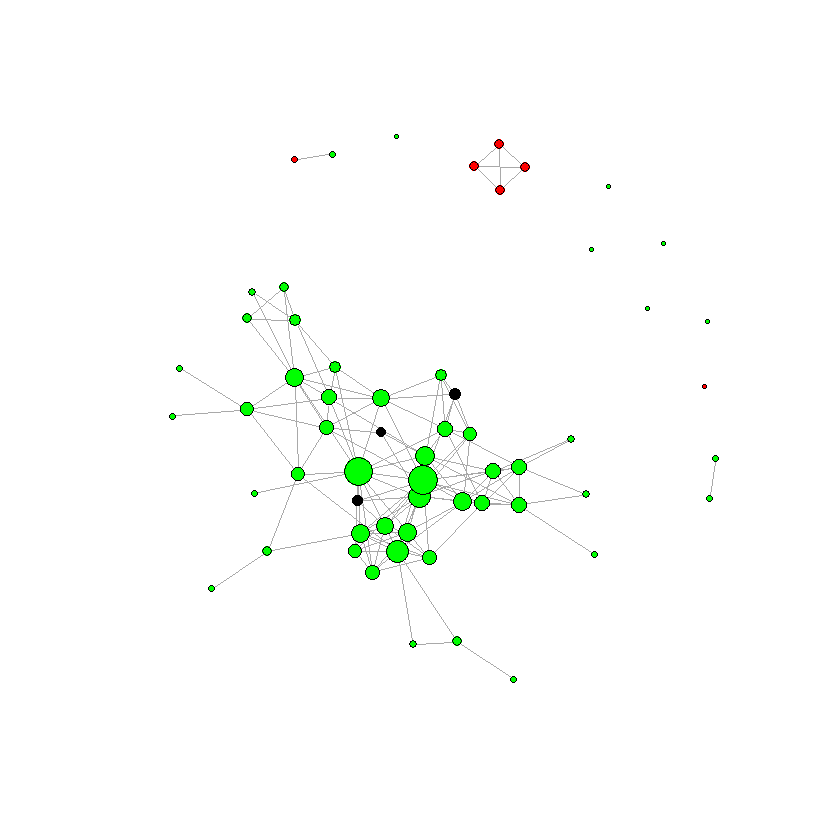

In [22]:
# Update colors of locale
V(g)$color <- "black"
V(g)$color[V(g)$locale == "A"] <- "red"
V(g)$color[V(g)$locale == "B"] <- "green"

# Plot graph
plot(g, vertex.label=NA)

**The large connected component is most associated with which locale?**

Answer: Locale B.

**The 4-user connected component is most associated with which locale?**

Answer: Locale A.

### Problem 4 - Other Plotting Options
The help page is a helpful tool when making visualizations. Answer the following questions with the help of *?igraph.plotting* and experimentation in your R console.

In [23]:
?igraph.plotting

**Which igraph plotting function would enable us to plot our graph in 3-D?**

Answer: rglplot.

**What parameter to the plot() function would we use to change the edge width when plotting g?**

Answer: edge.width.